In [ ]:
import pandas as pd 
from sklearn.utils import shuffle 
 
data = pd.read_csv('dataset.csv')
data = shuffle(data)
print(data)

     label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
20       0       0       0       0       0       0       0       0       0   
398      3       0       0       0       0       0       0       0       0   
296      2       0       0       0       0       0       0       0       0   
845      8       0       0       0       0       0       0       0       0   
528      5       0       0       0       0       0       0       0       0   
..     ...     ...     ...     ...     ...     ...     ...     ...     ...   
351      3       0       0       0       0       0       0       0       0   
316      3       0       0       0       0       0       0       0       0   
922      9       0       0       0       0       0       0       0       0   
819      8       0       0       0       0       0       0       0       0   
134      1       0       0       0       0       0       0       0       0   

     pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel

In [2]:
X = data.drop(["label"],axis=1)
Y= data["label"]

3


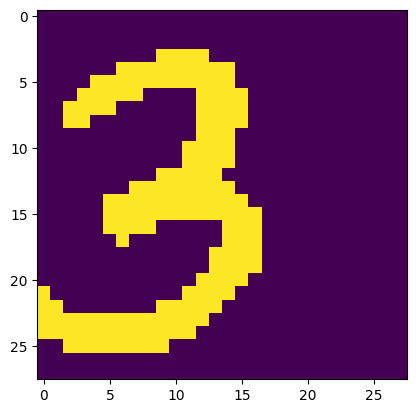

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
idx = 314
img = X.loc[idx].values.reshape(28,28)
print(Y[idx])
plt.imshow(img)

In [4]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y, test_size = 0.2)

In [5]:
import os
os.makedirs("model", exist_ok=True)


In [ ]:
import numpy as np
import joblib
from sklearn.svm import SVC

train_x = np.array(train_x)
test_x = np.array(test_x)

X_train_flat = train_x.reshape(train_x.shape[0], -1) 
x_test_flat = test_x.reshape(test_x.shape[0], -1)  


svm = SVC(kernel='linear', C=1.0)  

svm.fit(X_train_flat, train_y)

predictions = svm.predict(x_test_flat)

accuracy = np.mean(predictions == test_y)  
print(f"Accuracy: {accuracy * 100:.2f}%")

joblib.dump(svm, './model/digit_recognizer')

svm_loaded = joblib.load('./model/digit_recognizer')


Accuracy: 96.00%


In [ ]:

import joblib
import cv2
import numpy as np 
import time
import pyscreenshot as ImageGrab
  
model=joblib.load("model/digit_recognizer")
image_folder="./img/"
  
while True:
   img=ImageGrab.grab(bbox=(60,470,400,870))
    
   img.save(image_folder+"img.png")
   im = cv2.imread(image_folder+"img.png")
   im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
   im_gray  =cv2.GaussianBlur(im_gray, (15,15), 0)
    
   ret, im_th = cv2.threshold(im_gray,100, 255, cv2.THRESH_BINARY)
   roi = cv2.resize(im_th, (28,28), interpolation  =cv2.INTER_AREA)
    
   rows,cols=roi.shape
    
   X = []
    
   for i in range(rows):
       for j in range(cols):
           k = roi[i,j]
           if k>100:
               k=1
           else:
               k=0
           X.append(k)
            
   predictions  =model.predict([X])
   print("Prediction:",predictions[0])
   cv2.putText(im, "Prediction is: "+str(predictions[0]), (20,20), 0, 0.8,(0,255,0),2,cv2.LINE_AA)
    
   cv2.startWindowThread()
   cv2.namedWindow("Result")
   cv2.imshow("Result",im)
   cv2.waitKey(10000)
   if cv2.waitKey(1)==13:
       break
cv2.destroyAllWindows()

Prediction: 1
Prediction: 7
Prediction: 4
Prediction: 9
Prediction: 7
Prediction: 7
Prediction: 2


KeyboardInterrupt: 